In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [16]:
from google.colab import files
uploaded = files.upload()

Saving healthcare-dataset-stroke-data.csv to healthcare-dataset-stroke-data (1).csv


In [23]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv', na_values=['N/A', 'NaN', '', '?'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<ipython-input-24-0b078afd6c40>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='stroke', palette=colors)


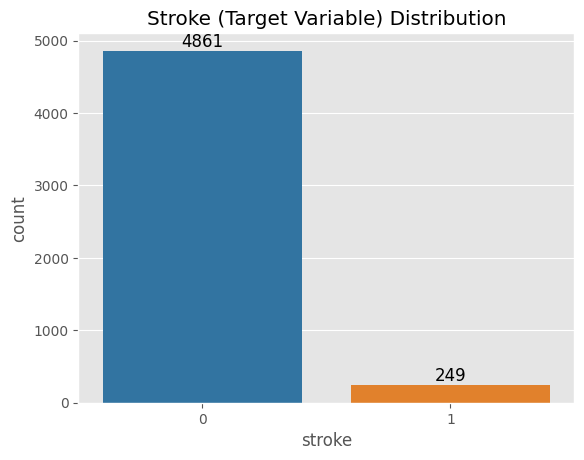

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example colors for two bars: no stroke and stroke
colors = ['#1f77b4', '#ff7f0e']  # blue and orange, you can customize these

ax = sns.countplot(data=df, x='stroke', palette=colors)

for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), f'{int(p.get_height())}',
            ha='center', va='bottom', fontsize=12)

plt.title('Stroke (Target Variable) Distribution')
plt.show()


Random undersampling is a technique used to balance class distributions by reducing the number of majority class instances.

In [29]:
# Drop 'id' if present
df = df.drop(columns=['id']) if 'id' in df.columns else df

# Drop missing values (optional — or impute them later)
df = df.dropna()

# Separate stroke and no-stroke
stroke_df = df[df['stroke'] == 1]
no_stroke_df = df[df['stroke'] == 0]

# Undersample the majority class
no_stroke_sampled = no_stroke_df.sample(n=len(stroke_df), random_state=42)

# Combine to form balanced dataset
balanced_sample_df = pd.concat([stroke_df, no_stroke_sampled], axis=0).sample(frac=1, random_state=42)  # shuffle

# Save the balanced sample
balanced_sample_df.to_csv("stroke_data_balanced_sample.csv", index=False)

# Check class balance
print("Class distribution:\n", balanced_sample_df['stroke'].value_counts())

Class distribution:
 stroke
0    209
1    209
Name: count, dtype: int64


# EDA Steps After Balancing

In [30]:
#Descriptive statistics
df_balanced = pd.concat([stroke_df, no_stroke_df.sample(n=len(stroke_df), random_state=42)])
df_balanced = df_balanced.sample(frac=1, random_state=42)  # shuffle

# View basic statistics
df_balanced.describe(include='all')


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,418,418.000000,418.000000,418.000000,418,418,418,418.000000,418.000000,418,418.000000
unique,2,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,246,NaN,NaN,NaN,317,244,215,NaN,NaN,163,NaN
mean,NaN,54.175311,0.184211,0.124402,NaN,NaN,NaN,121.133206,29.519378,NaN,0.500000
std,NaN,22.459544,0.388120,0.330435,NaN,NaN,NaN,56.790911,7.327271,NaN,0.500599
min,NaN,0.480000,0.000000,0.000000,NaN,NaN,NaN,55.350000,14.600000,NaN,0.000000
25%,NaN,40.000000,0.000000,0.000000,NaN,NaN,NaN,78.067500,24.300000,NaN,0.000000
50%,NaN,58.000000,0.000000,0.000000,NaN,NaN,NaN,97.970000,28.400000,NaN,0.500000
75%,NaN,74.000000,0.000000,0.000000,NaN,NaN,NaN,162.207500,32.900000,NaN,1.000000


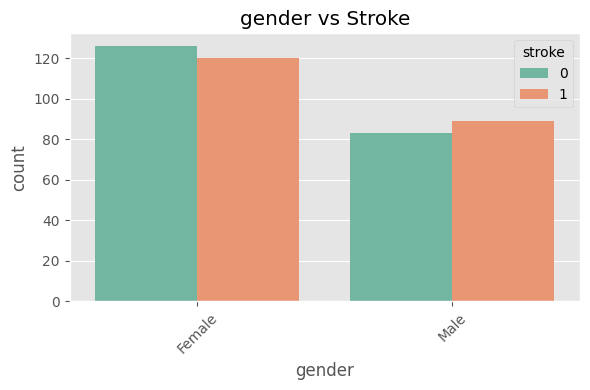

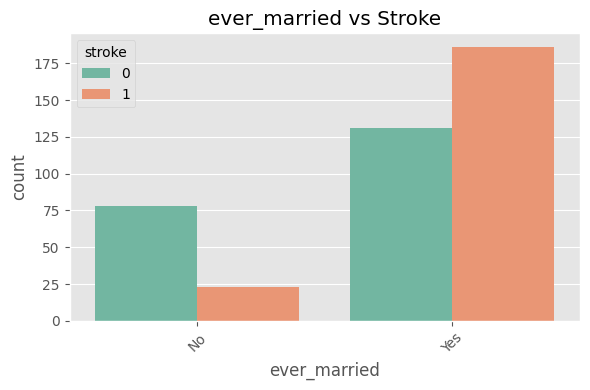

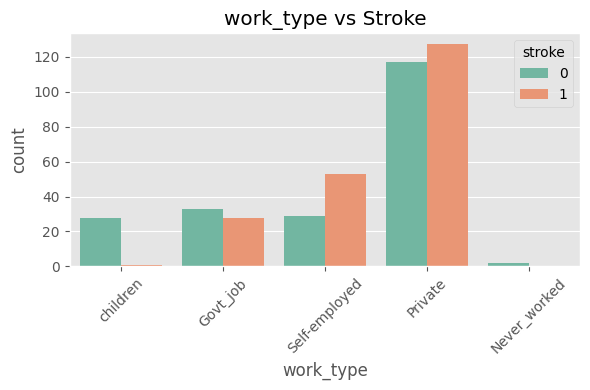

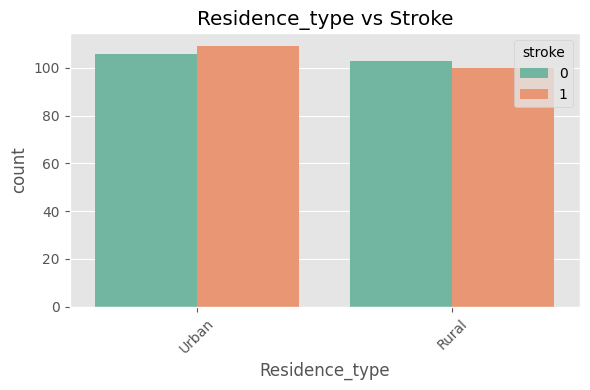

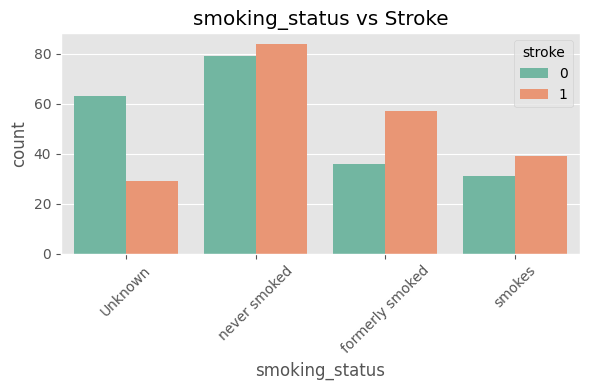

In [27]:
# Visualize Categorical Features
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df_balanced, x=col, hue='stroke', palette='Set2')
    plt.title(f'{col} vs Stroke')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


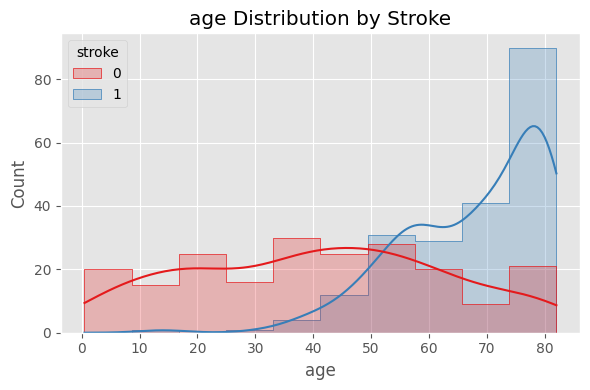

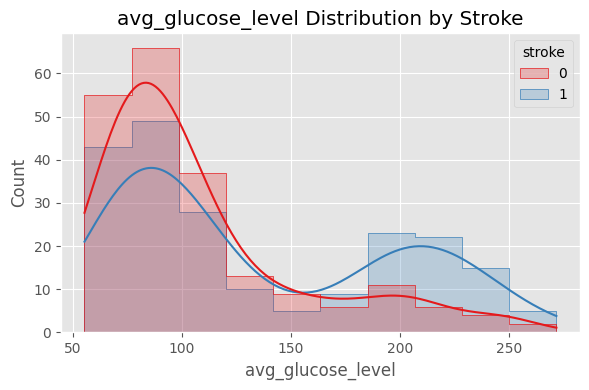

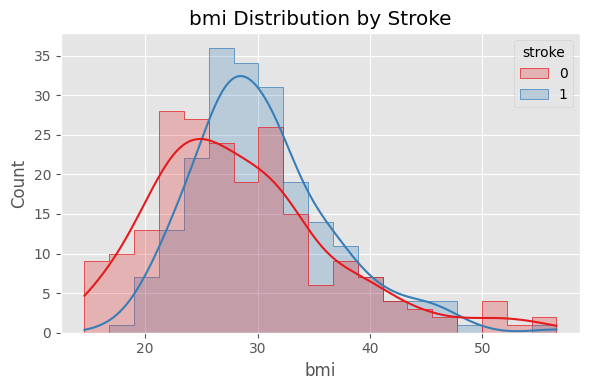

In [31]:
# Visualize Numerical Features
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df_balanced, x=col, hue='stroke', kde=True, element='step', palette='Set1')
    plt.title(f'{col} Distribution by Stroke')
    plt.tight_layout()
    plt.show()


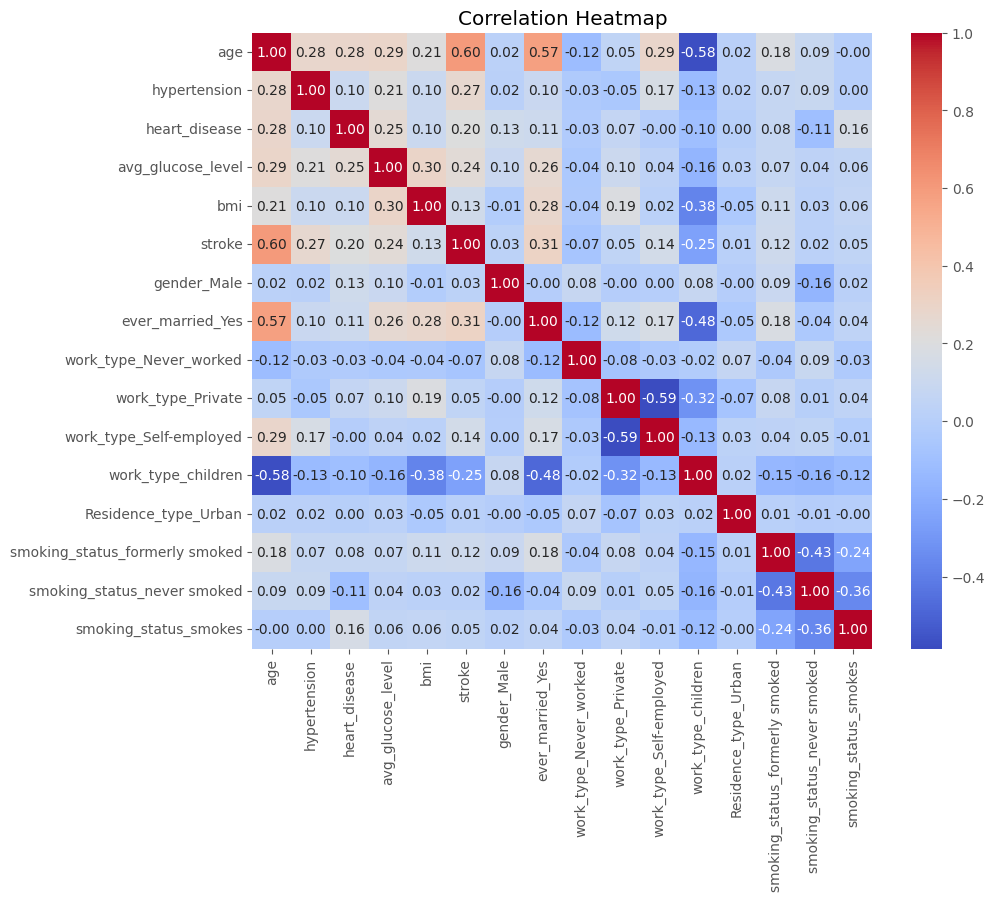

In [32]:
# Correlation Heatmap
# Encode categoricals temporarily
df_encoded = df_balanced.copy()
df_encoded = pd.get_dummies(df_encoded, drop_first=True)

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()


<ipython-input-33-8a39d6648a8b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_balanced, x='stroke', y=col, palette='Set3')


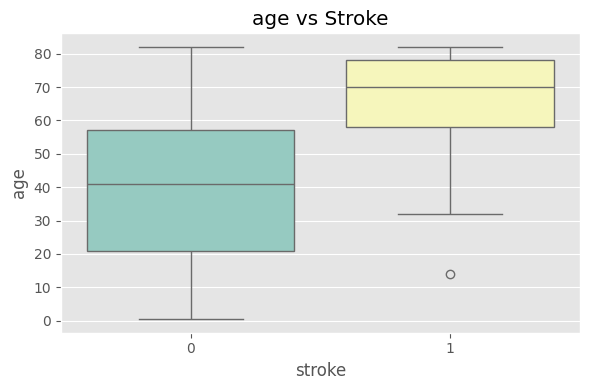

<ipython-input-33-8a39d6648a8b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_balanced, x='stroke', y=col, palette='Set3')


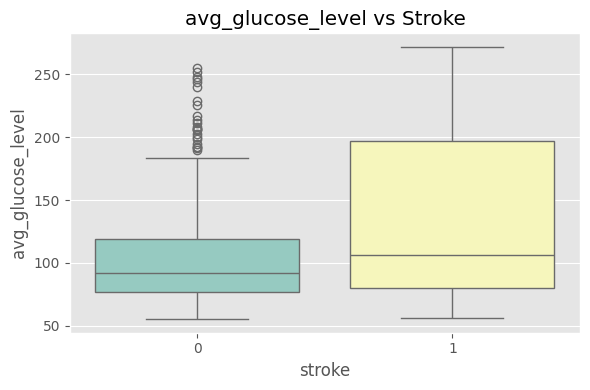

<ipython-input-33-8a39d6648a8b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_balanced, x='stroke', y=col, palette='Set3')


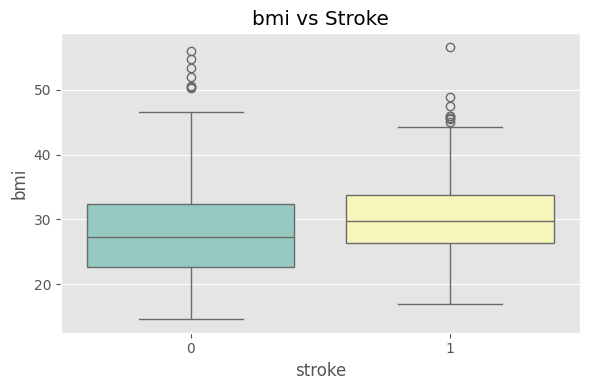

In [33]:
#Boxplots for Outlier Detection
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_balanced, x='stroke', y=col, palette='Set3')
    plt.title(f'{col} vs Stroke')
    plt.tight_layout()
    plt.show()


## Pairplots are useful to understand how features interact with each other by stroke outcome.

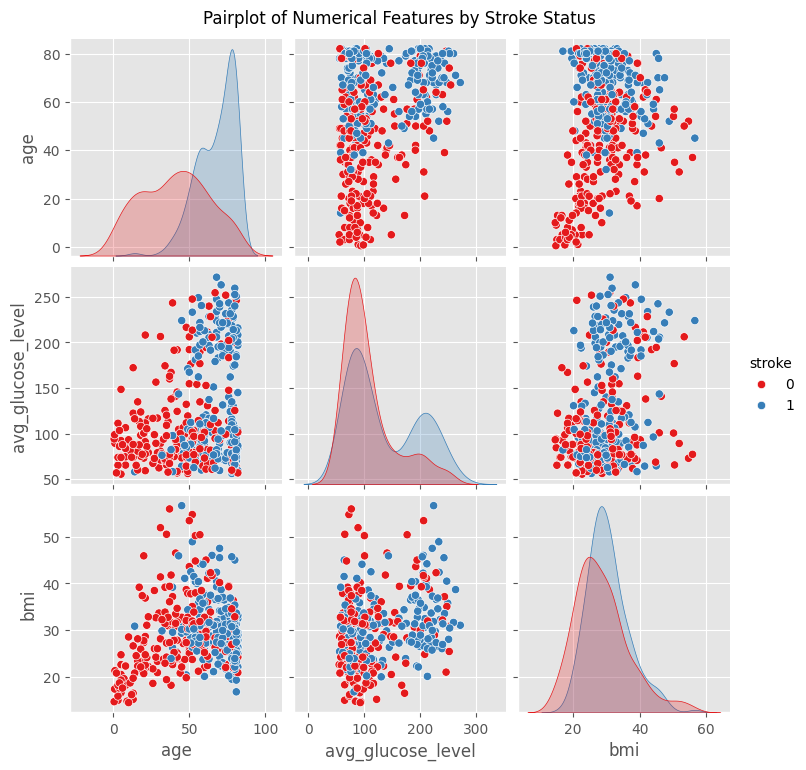

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select key numerical features and stroke for plotting
pairplot_df = df_balanced[['age', 'avg_glucose_level', 'bmi', 'stroke']]

# Plot
sns.pairplot(pairplot_df, hue='stroke', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features by Stroke Status', y=1.02)
plt.show()


## Chi-Square Test (Association Between Categorical Variables and Stroke)

In [35]:
from scipy.stats import chi2_contingency

# List of categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Chi-square test loop
for col in categorical_cols:
    contingency = pd.crosstab(df_balanced[col], df_balanced['stroke'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"\nChi-Square Test for '{col}' vs Stroke:")
    print(f"Chi2: {chi2:.4f}, p-value: {p:.4f}")
    if p < 0.05:
        print("➡️ Significant association with stroke")
    else:
        print("❌ No significant association with stroke")



Chi-Square Test for 'gender' vs Stroke:
Chi2: 0.2470, p-value: 0.6192
❌ No significant association with stroke

Chi-Square Test for 'ever_married' vs Stroke:
Chi2: 38.0700, p-value: 0.0000
➡️ Significant association with stroke

Chi-Square Test for 'work_type' vs Stroke:
Chi2: 34.9820, p-value: 0.0000
➡️ Significant association with stroke

Chi-Square Test for 'Residence_type' vs Stroke:
Chi2: 0.0383, p-value: 0.8448
❌ No significant association with stroke

Chi-Square Test for 'smoking_status' vs Stroke:
Chi2: 18.3748, p-value: 0.0004
➡️ Significant association with stroke


# Prepare Data for Machine Learning

In [36]:
# Step 1: One-hot encode categorical variables
df_model = df_balanced.copy()
df_model = pd.get_dummies(df_model, columns=categorical_cols, drop_first=True)


In [37]:
# Step 2: Separate features and target
X = df_model.drop('stroke', axis=1)
y = df_model['stroke']


In [38]:
# Step 3: Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [39]:
# Step 4: Feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Train models

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Train model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)

# Predict
y_pred = logreg.predict(X_test_scaled)
y_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Evaluation
print("🔍 Logistic Regression Results:\n")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob):.4f}")


🔍 Logistic Regression Results:

[[32 10]
 [ 9 33]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        42
           1       0.77      0.79      0.78        42

    accuracy                           0.77        84
   macro avg       0.77      0.77      0.77        84
weighted avg       0.77      0.77      0.77        84

ROC-AUC: 0.8220


In [41]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("🌳 Random Forest Results:\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")


🌳 Random Forest Results:

[[31 11]
 [11 31]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        42
           1       0.74      0.74      0.74        42

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84

ROC-AUC: 0.8464


In [42]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_prob_rf = rf.predict_proba(X_test_scaled)[:, 1]

print("🌳 Random Forest Results:\n")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_rf):.4f}")


🌳 Random Forest Results:

[[31 11]
 [11 31]]
              precision    recall  f1-score   support

           0       0.74      0.74      0.74        42
           1       0.74      0.74      0.74        42

    accuracy                           0.74        84
   macro avg       0.74      0.74      0.74        84
weighted avg       0.74      0.74      0.74        84

ROC-AUC: 0.8464


In [43]:
pip install xgboost


In [44]:
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
y_prob_xgb = xgb.predict_proba(X_test_scaled)[:, 1]

print("⚡ XGBoost Results:\n")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print(f"ROC-AUC: {roc_auc_score(y_test, y_prob_xgb):.4f}")


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:26:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


⚡ XGBoost Results:

[[32 10]
 [ 9 33]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        42
           1       0.77      0.79      0.78        42

    accuracy                           0.77        84
   macro avg       0.77      0.77      0.77        84
weighted avg       0.77      0.77      0.77        84

ROC-AUC: 0.8447


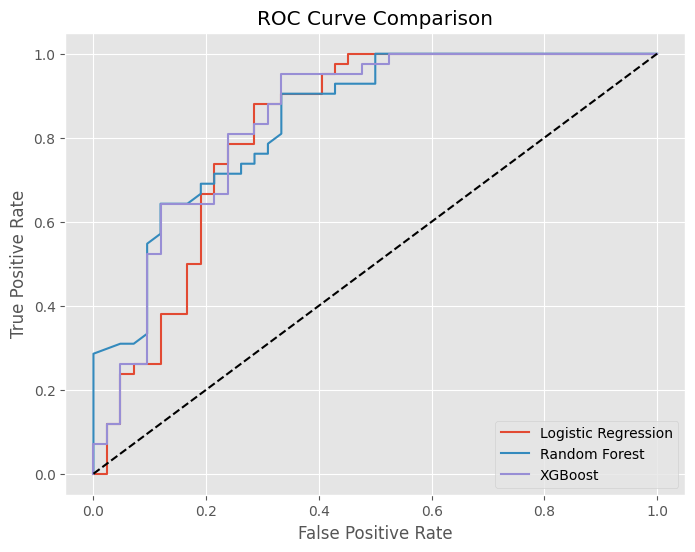

In [45]:
fpr1, tpr1, _ = roc_curve(y_test, y_prob)
fpr2, tpr2, _ = roc_curve(y_test, y_prob_rf)
fpr3, tpr3, _ = roc_curve(y_test, y_prob_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr1, tpr1, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Random Forest')
plt.plot(fpr3, tpr3, label='XGBoost')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


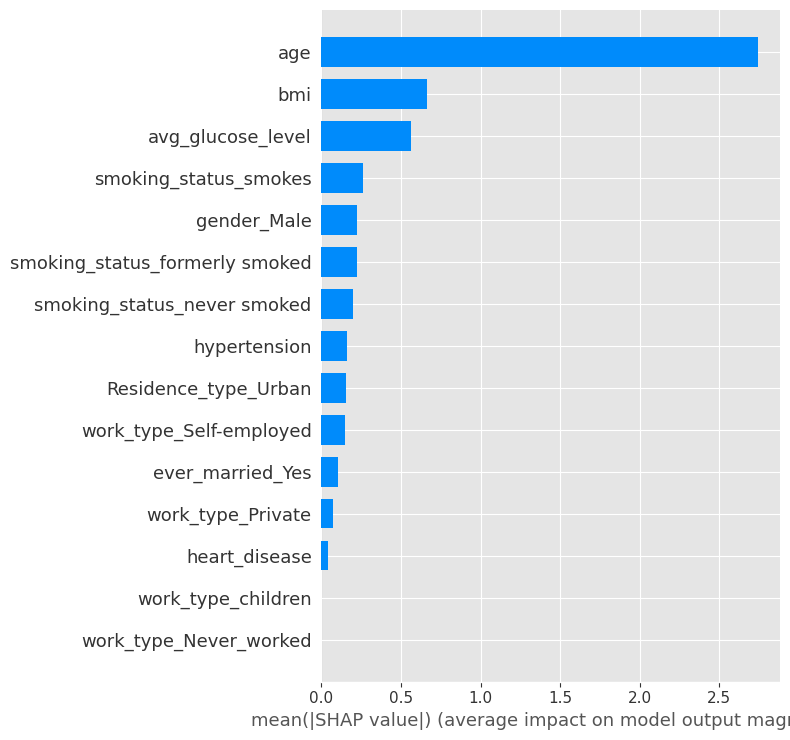

In [47]:
import shap

explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_test_scaled)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, plot_type="bar")


In [48]:
# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

# Train Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
lr_proba = lr_model.predict_proba(X_test)[:, 1]

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# Train XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

# Create summary results table
models = {
    'Logistic Regression': (lr_preds, lr_proba),
    'Random Forest': (rf_preds, rf_proba),
    'XGBoost': (xgb_preds, xgb_proba)
}

results = []

for name, (preds, probas) in models.items():
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    rec = recall_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    auc = roc_auc_score(y_test, probas)

    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Precision': round(prec, 4),
        'Recall': round(rec, 4),
        'F1 Score': round(f1, 4),
        'AUC': round(auc, 4)
    })

# Display results in a DataFrame
results_df = pd.DataFrame(results)
results_df


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [07:26:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.7500,0.7561,0.7381,0.7470,0.8214
1,Random Forest,0.7381,0.7500,0.7143,0.7317,0.8461
2,XGBoost,0.7738,0.7674,0.7857,0.7765,0.8447


## Compare Model Performance

In [49]:
import pandas as pd

results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_score(y_test, y_pred),
                 accuracy_score(y_test, y_pred_rf),
                 accuracy_score(y_test, y_pred_xgb)],
    'Precision': [precision_score(y_test, y_pred),
                  precision_score(y_test, y_pred_rf),
                  precision_score(y_test, y_pred_xgb)],
    'Recall': [recall_score(y_test, y_pred),
               recall_score(y_test, y_pred_rf),
               recall_score(y_test, y_pred_xgb)],
    'F1 Score': [f1_score(y_test, y_pred),
                 f1_score(y_test, y_pred_rf),
                 f1_score(y_test, y_pred_xgb)],
    'ROC AUC': [roc_auc_score(y_test, y_prob),
                roc_auc_score(y_test, y_prob_rf),
                roc_auc_score(y_test, y_prob_xgb)]
})

print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score   ROC AUC
0  Logistic Regression  0.773810   0.767442  0.785714  0.776471  0.821995
1        Random Forest  0.738095   0.738095  0.738095  0.738095  0.846372
2              XGBoost  0.773810   0.767442  0.785714  0.776471  0.844671


## Hyperparameter Tuning (Optional)

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_rf.fit(X_train_scaled, y_train)

print("Best params:", grid_rf.best_params_)


Best params: {'max_depth': 4, 'min_samples_split': 5, 'n_estimators': 100}


## Save the Best Model

In [51]:
import joblib
import pandas as pd  # Import pandas

# Save model
joblib.dump(xgb, 'stroke_xgb_model.pkl')

# Save scaled dataset
# Convert the NumPy array X_test_scaled back to a pandas DataFrame
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Save the DataFrame to CSV
X_test_scaled_df.to_csv('X_test_scaled.csv', index=False)


## Make Predictions on New Data

In [52]:
# Load the model
model = joblib.load('stroke_xgb_model.pkl')

# Predict on new data
# Use NumPy array indexing instead of iloc
new_data = X_test_scaled[0:1]
prediction = model.predict(new_data)
print("Stroke Risk Prediction:", prediction)


Stroke Risk Prediction: [1]
